# animations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
cols = ['NOSE_X', 'NOSE_Y', 'NOSE_C', 'NECK_X', 'NECK_Y', 'NECK_C', #
       'R_SHOULDER_X', 'R_SHOULDER_Y', 'R_SHOULDER_C', 'R_ELBOW_X',
       'R_ELBOW_Y', 'R_ELBOW_C', 'R_WRIST_X', 'R_WRIST_Y', 'R_WRIST_C',
       'L_SHOULDER_X', 'L_SHOULDER_Y', 'L_SHOULDER_C', 'L_ELBOW_X',
       'L_ELBOW_Y', 'L_ELBOW_C', 'L_WRIST_X', 'L_WRIST_Y', 'L_WRIST_C',
       'M_HIP_X', 'M_HIP_Y', 'M_HIP_C', 'R_HIP_X', 'R_HIP_Y', 'R_HIP_C',
       'R_KNEE_X', 'R_KNEE_Y', 'R_KNEE_C', 'R_ANKLE_X', 'R_ANKLE_Y',
       'R_ANKLE_C', 'L_HIP_X', 'L_HIP_Y', 'L_HIP_C', 'L_KNEE_X', 'L_KNEE_Y',
       'L_KNEE_C', 'L_ANKLE_X', 'L_ANKLE_Y', 'L_ANKLE_C', 'R_EYE_X', 'R_EYE_Y',
       'R_EYE_C', 'L_EYE_X', 'L_EYE_Y', 'L_EYE_C', 'R_EAR_X', 'R_EAR_Y',
       'R_EAR_C', 'L_EAR_X', 'L_EAR_Y', 'L_EAR_C', 'L_BIG_TOE_X',
       'L_BIG_TOE_Y', 'L_BIG_TOE_C', 'L_SMALL_TOE_X', 'L_SMALL_TOE_Y',
       'L_SMALL_TOE_C', 'L_HEEL_X', 'L_HEEL_Y', 'L_HEEL_C', 'R_BIG_TOE_X',
       'R_BIG_TOE_Y', 'R_BIG_TOE_C', 'R_SMALL_TOE_X', 'R_SMALL_TOE_Y',
       'R_SMALL_TOE_C', 'R_HEEL_X', 'R_HEEL_Y', 'R_HEEL_C', 'R_ANGLE_ELBOW',
       'R_ANGLE_ARMPIT', 'L_ANGLE_ELBOW', 'L_ANGLE_ARMPIT']

In [3]:
# Load the CSV file
directory = 'data/train/'
csv_file_paths = ['13812481_violin.csv', 
                  '10321738_drums.csv', 
                  '98545019_boxing.csv', 
                  '10665562_guitar.csv', 
                  '86094482_rowing.csv']
colors = ["red", "green", "blue", "black", "orange"]

data = []
for i,file in enumerate(csv_file_paths):
    df = pd.read_csv(directory + file, header=None, names=cols)
    df = df.dropna()
    df["activity"] = file.split(".")[0].split("_")[1]
    df["color"] = colors[i]
    data.append(df)
    print(file)

df = pd.concat(data)
df = df.reset_index(drop=True)
df

13812481_violin.csv
10321738_drums.csv
98545019_boxing.csv
10665562_guitar.csv
86094482_rowing.csv


,NOSE_X,NOSE_Y,NOSE_C,NECK_X,NECK_Y,NECK_C,R_SHOULDER_X,R_SHOULDER_Y,R_SHOULDER_C,R_ELBOW_X,...,R_SMALL_TOE_C,R_HEEL_X,R_HEEL_Y,R_HEEL_C,R_ANGLE_ELBOW,R_ANGLE_ARMPIT,L_ANGLE_ELBOW,L_ANGLE_ARMPIT,activity,color
0,291.880554,86.91227,0.893562,295.85672,201.44017,0.866296,211.502853,201.388031,0.729722,143.172394,...,0.0,0.000000,0.000000,0.0,2.985523,2.058475,3.085705,1.949019,violin,red
1,293.000000,87.00000,1.000000,296.00000,201.00000,1.000000,211.000000,201.000000,1.000000,149.000000,...,0.0,-50.139229,7.153316,0.0,3.039786,2.044312,3.091043,1.967801,violin,red
2,294.000000,87.00000,1.000000,297.00000,201.00000,1.000000,212.000000,201.000000,1.000000,148.000000,...,0.0,-49.986801,7.450943,0.0,3.037052,2.057316,3.086308,1.975184,violin,red
3,295.000000,87.00000,1.000000,298.00000,201.00000,1.000000,212.000000,201.000000,1.000000,148.000000,...,0.0,-49.930725,6.900085,0.0,3.029581,2.067765,3.085020,1.981366,violin,red
4,296.000000,87.00000,1.000000,299.00000,201.00000,1.000000,212.000000,201.000000,1.000000,148.000000,...,0.0,-49.312393,7.335587,0.0,3.039571,2.071340,3.077095,1.988794,violin,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,315.000000,113.00000,1.000000,313.00000,203.00000,1.000000,246.000000,200.000000,1.000000,225.000000,...,0.0,-16.783142,0.491116,0.0,3.095271,1.713029,3.130953,1.826887,rowing,orange
1017,315.000000,113.00000,1.000000,313.00000,203.00000,1.000000,246.000000,200.000000,1.000000,226.000000,...,0.0,-16.802673,0.479626,0.0,3.102765,1.704318,3.118766,1.828591,rowing,orange
1018,315.000000,113.00000,1.000000,313.00000,203.00000,1.000000,246.000000,200.000000,1.000000,226.000000,...,0.0,-17.047825,0.438492,0.0,3.101568,1.704318,3.112367,1.832092,rowing,orange
1019,315.000000,113.00000,1.000000,313.00000,203.00000,1.000000,246.000000,200.000000,1.000000,226.000000,...,0.0,-15.843010,0.428482,0.0,3.095711,1.702759,3.109156,1.833892,rowing,orange


In [4]:
df["L_EAR_X"]

0       332.121399
1       333.000000
2       334.000000
3       335.000000
4       336.000000
           ...    
1016    349.000000
1017    349.000000
1018    349.000000
1019    349.000000
1020    349.000000
Name: L_EAR_X, Length: 1021, dtype: float64

In [5]:
connections = [
    ('NOSE', 'R_EYE'),
    ('NOSE', 'L_EYE'),
    ('R_EYE', 'R_EAR'),
    ('L_EYE', 'L_EAR'),
    ('NOSE', 'NECK'),
    ('NECK', 'R_SHOULDER'),
    ('R_SHOULDER', 'R_ELBOW'),
    ('R_ELBOW', 'R_WRIST'),
    ('NECK', 'L_SHOULDER'),
    ('L_SHOULDER', 'L_ELBOW'),
    ('L_ELBOW', 'L_WRIST'),
    ('NECK', 'M_HIP'),
    ('M_HIP', 'R_HIP'),
    ('R_HIP', 'R_KNEE'),
    ('R_KNEE', 'R_ANKLE'),
    ('M_HIP', 'L_HIP'),
    ('L_HIP', 'L_KNEE'),
    ('L_KNEE', 'L_ANKLE'),
    ('L_ANKLE', 'L_BIG_TOE'),
    ('L_BIG_TOE', 'L_SMALL_TOE'),
    ('L_ANKLE', 'L_HEEL'),
    ('R_ANKLE', 'R_BIG_TOE'),
    ('R_BIG_TOE', 'R_SMALL_TOE'),
    ('R_ANKLE', 'R_HEEL'),]

def create_connection(i):
    a = connections[i][0]
    b = connections[i][1]
    return a,b
create_connection(0)

('NOSE', 'R_EYE')

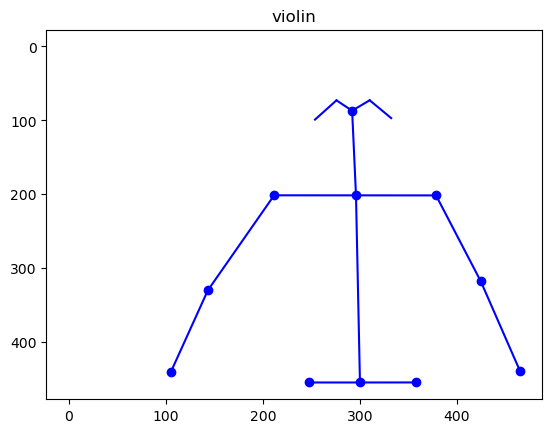

In [6]:
body_parts = ['NOSE', 'NECK', 'R_SHOULDER', 'R_ELBOW', 'R_WRIST', 'L_SHOULDER', 'L_ELBOW', 'L_WRIST', 'M_HIP', 'R_HIP', 'R_KNEE', 'R_ANKLE', 'L_HIP', 'L_KNEE', 'L_ANKLE']

# Create a function to update the plot for each frame of the animation
def update(frame):
    plt.cla()  # Clear the previous plot
    plt.title(df["activity"][frame])
    skipped_parts = []
    
    for part in body_parts:
        if df[part+'_X'][frame] <= 0 or df[part+'_Y'][frame] <= 0: 
            skipped_parts.append(part)
            continue
            
        plt.plot(df[part+'_X'][frame], df[part+'_Y'][frame], 'bo')  # color=df["color"][frame] # Plot each body part
    # Example: Connect the body parts to create the skeletal structure
    for i in range(len(connections)):
        a, b = create_connection(i)
        
        if len(skipped_parts) > 0 and ((a in skipped_parts) or (b in skipped_parts)):
            continue
        plt.plot([df[a + '_X'][frame], df[b + '_X'][frame]], [df[a + '_Y'][frame], df[b + '_Y'][frame]], 'b-') # color=df["color"][frame]
    plt.gca().invert_yaxis() # flips the graph upside down

# Create the animation
fig = plt.figure()

ani = animation.FuncAnimation(fig, update, frames=len(df), interval=60)  # Update the plot for each frame
    
# Display the animation
ani.save("skeleton.mp4")